In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
from sklearn.metrics import mean_squared_error

In [34]:
#pip install pmdarima --quiet

In [35]:
data=pd.read_csv('/kaggle/input/pune-temp/Pune.csv')

In [36]:
#checking columns
data.columns

Index(['Date', 'T2M'], dtype='object')

In [37]:
# convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d%H')
data.head()

,Date,T2M
0,2004-01-01 05:00:00,15.16
1,2004-01-01 06:00:00,14.92
2,2004-01-01 07:00:00,16.80
3,2004-01-01 08:00:00,20.33
4,2004-01-01 09:00:00,24.30


In [38]:
#changing index to date
data.index = data['Date']
data.head()

,Date,T2M
Date,,
2004-01-01 05:00:00,2004-01-01 05:00:00,15.16
2004-01-01 06:00:00,2004-01-01 06:00:00,14.92
2004-01-01 07:00:00,2004-01-01 07:00:00,16.80
2004-01-01 08:00:00,2004-01-01 08:00:00,20.33
2004-01-01 09:00:00,2004-01-01 09:00:00,24.30


In [39]:
data=data.sort_index()

In [40]:
data.count()

Date    175320
T2M     175320
dtype: int64

In [41]:
#Renaming columns
data.rename(columns={'T2M': 'TEMP'}, inplace=True)

In [42]:
# Splitting data into train and test sets
train_data = data[:43800]  # Use all data except the last 120 hours for training
test_data = data[43800:43824]   # Use the last 24 hours for testing

In [43]:
ARIMA_model = pm.auto_arima(train_data['TEMP'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=True, # No Seasonality for standard ARIMA
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

In [44]:
forecast, confint = ARIMA_model.predict(n_periods=24, return_conf_int=True)

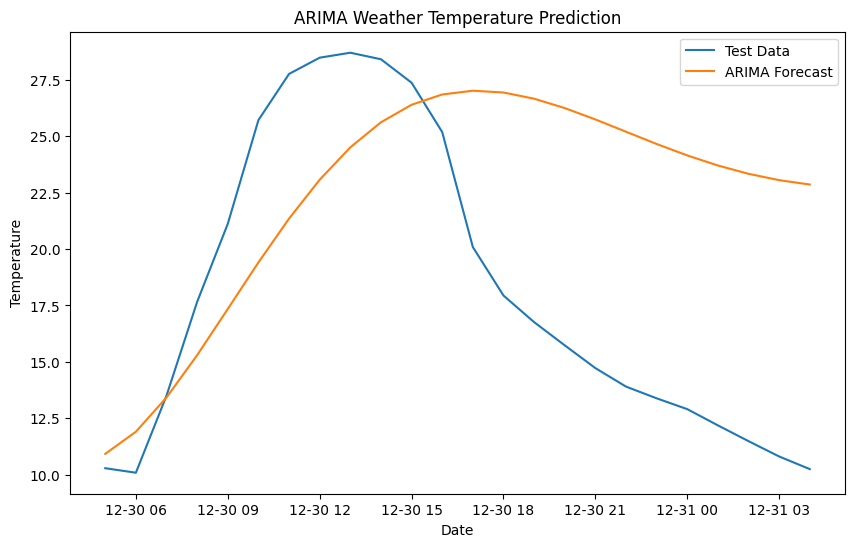

In [51]:
plt.figure(figsize=(10,6))
#plt.plot(train_data.index, train_data['TEMP'], label='Training Data')
plt.plot(test_data.index, test_data['TEMP'], label='Test Data')
plt.plot(test_data.index, forecast, label='ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('ARIMA Weather Temperature Prediction')
plt.legend()
plt.savefig("/kaggle/working/1.jpeg")
plt.show()

In [52]:
rmse = np.sqrt(mean_squared_error(test_data['TEMP'], forecast))
print('RMSE:', rmse)

RMSE: 8.133726644721992
